## Step 1: Single Read - Save 20, 25, 30, 35, 40 C recordings for the array

What is the hotplate temperature?25
What is the sample ID?2
['COM3', 'COM12']
Which COM port? Please enter a number: Example: 01
Populating the interactive namespace from numpy and matplotlib


C:\Users\Oximeter\Anaconda\lib\site-packages\matplotlib\tri\triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


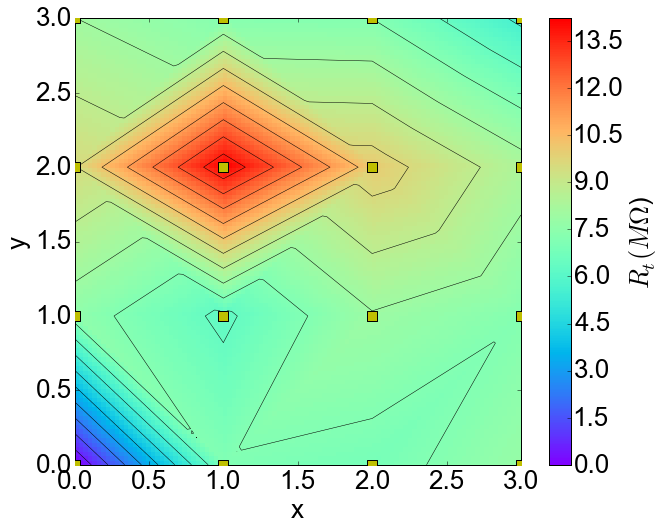

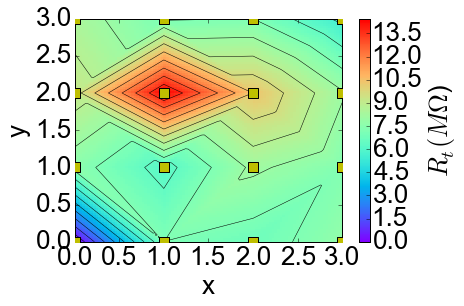

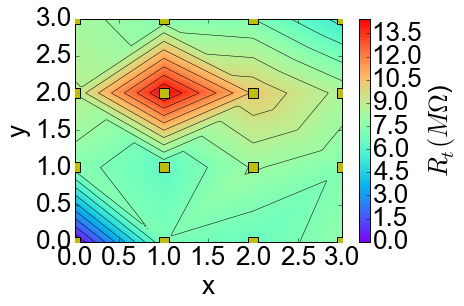

C:\Users\Oximeter\Dropbox\project_thermistor_share\thermistor_array_driver\desktop_app\data


In [1]:
cal_temp = raw_input("What is the hotplate temperature?")
sample_id = raw_input("What is the sample ID?")

from ser_ports import serial_ports
ser_ports = serial_ports()
print ser_ports
port_id = raw_input("Which COM port? Please enter a number: Example: 0")

%pwd
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.mlab as ml
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext
from collections import Counter
import scipy.ndimage as ndimage
import serial
import time
from IPython import display
import datetime

from matplotlib import rcParams
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial'],'size': 26})

fig = plt.figure(figsize=(10,8))

ny, nx = 100, 100
xmin, xmax = 0, 3
ymin, ymax = 0, 3
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)

x = np.array([0,0,1,1,2,2,3,3,3,3,2,2,1,1,0,0])
y = np.array([3,2,3,2,3,2,3,2,1,0,1,0,1,0,1,0])
z = []
ser = serial.Serial(ser_ports[int(port_id)], 115200)

for i in range(3):
    
    data = ser.readline().split(" ")

    if len(data)==33:
        try:

            z = data[2::2];
            z = np.array([float(z) for z in z])

            zi = ml.griddata(x, y, z, xi, yi,interp='linear')

            ct = plt.contour(xi, yi, zi, 20, linewidths = 0.5, colors = 'k')
            im = plt.pcolormesh(xi, yi, zi, cmap = plt.get_cmap('rainbow'))
            cb = plt.colorbar(im, orientation='vertical',shrink=1.0) 
            #cb.ax.set_title(r'$R_t (M\Omega$)',fontsize = 26)
            cb.set_label(r'$R_t (M\Omega$)',fontsize = 26)
            plt.scatter(x, y, marker = 's', c = 'y', s = 100, zorder = 100)
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            plt.xlabel("x")
            plt.ylabel("y")
            plt.show()

        except KeyboardInterrupt:
            break 
z = np.array(z)
ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y_%m_%d_%H_%M_%S')

filename = st+"_"+sample_id+"_temp_"+cal_temp+'.txt'
%cd data

np.savetxt(filename, z, fmt='%.6f', delimiter=' ')

fig.savefig(st+"_"+sample_id+"_temp_"+cal_temp+'.png', dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches=None, pad_inches=0,
            frameon=None)

## Step 2: Temperature and beta plots for 16 channels

In [ ]:
# open file 
%cd data

import Tkinter, tkFileDialog
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.mlab as ml
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext
from collections import Counter
import scipy.ndimage as ndimage
import serial
import time
from IPython import display
import datetime

from matplotlib import rcParams
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial'],'size': 26})

root = Tkinter.Tk() # make a top-level instance and hide since it is ugly and big
root.withdraw()
root.overrideredirect(True) # make it almost invisible - no decorations, 0 size, top left corner
root.geometry('0x0+0+0')
root.deiconify() # show window again and lift it to top so it can get focus
root.lift() # otherwise dialogs will end up behind the terminal.
root.focus_force()

fname_20 = tkFileDialog.askopenfilename(title = "Select file for 20C")
data_20 = np.genfromtxt(fname_20, delimiter=',', skip_footer=0, skip_header=0)

fname_25 = tkFileDialog.askopenfilename(title = "Select file for 25C")
data_25 = np.genfromtxt(fname_25, delimiter=',', skip_footer=0, skip_header=0)

fname_30 = tkFileDialog.askopenfilename(title = "Select file for 30C")
data_30 = np.genfromtxt(fname_30, delimiter=',', skip_footer=0, skip_header=0)

fname_35 = tkFileDialog.askopenfilename(title = "Select file for 35C")
data_35 = np.genfromtxt(fname_35, delimiter=',', skip_footer=0, skip_header=0)

fname_40 = tkFileDialog.askopenfilename(title = "Select file for 40C")
data_40 = np.genfromtxt(fname_40, delimiter=',', skip_footer=0, skip_header=0)

sample_id = raw_input("What is the sample ID?")

pixel_id = np.arange(1,17,1)
temp = np.array([20,25,30,35,40])
s = np.vstack([data_20, data_25,data_30,data_35,data_40])  
s = s.T

fig, (ax1) = plt.subplots(1,1, sharex=True, dpi=300, facecolor='w', edgecolor='w')

for i in range (0,len(pixel_id)):
    ax1.plot(temp, [data_20[i], data_25[i],data_30[i],data_35[i],data_40[i]], linestyle="dashed", marker="o", label="s{0}".format(i+1))

# x ticks
xs1_hi = 1.05*np.amax(temp)
xs1_lo = .9*np.amin(temp)
ax1.set_xlim(xs1_lo,xs1_hi)
xticks1 = np.arange(20,45,5)
xticks11 = np.around(xticks1,decimals=1)
ax1.set_xticks(xticks11)

# y ticks
ys1_hi = 1.1*np.amax(s)
ys1_lo = .9*np.amin(s)
ax1.set_ylim(ys1_lo,ys1_hi)
yticks1 = np.linspace(ys1_lo,ys1_hi,num=8)
yticks11 = np.around(yticks1,decimals=1)
ax1.set_yticks(yticks11)

ax1.set_ylabel(r'$R_t (M\Omega$)')
ax1.set_xlabel(r'$T(^\circ$C)')

#grid lines
plt.grid(b=True, which='major', color='k', linestyle='--')
#grid(b=True, which='minor', color='k', linestyle='--')
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'

#legends
leg1 = plt.legend(bbox_to_anchor=(1.7, 1), ncol=2, fontsize = 18, fancybox=True)# bbox_to_anchor=(1, 1)#\
leg1.get_frame().set_alpha(0)

#show plot
plt.show()

ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y_%m_%d_%H_%M_%S')

filename = st+"_"+sample_id+'_beta.txt'

fig.savefig(st+"_"+sample_id+'_temp_plot.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0)

dy = []
dx = []
beta_n = []
sm = []
temp_n = temp + 273

for i in range (0,len(pixel_id)):
    sm.append(np.log(s[i]*1e6))
    dy.append(sm[i][0]-sm[i][-1])
    dx.append((1000.0/temp_n[0])-(1000.0/temp_n[-1]))
    beta_n.append(1000.0*(dy[i] / dx[i]))

fig, (ax2) = plt.subplots(1,1, dpi=300, facecolor='w', edgecolor='w')


for i in range (0,len(pixel_id)):
    ax2.plot(1000.0/temp_n, sm[i], linestyle="dashed", marker="o", label =r's%s ($\beta=%2.2f$)'%(i+1,beta_n[i]))
    #ax1.plot(temp, s[i], linestyle="dashed", marker="o", label="s{0}".format(i+1))    

ax2.set_ylabel(r'ln($R_T$) ($\Omega$)')
ax2.set_xlabel(r'1000/Temp (1/K)')

# x ticks
xs2_hi = 1.02*np.amax(1000.0/temp_n)
xs2_lo = .98*np.amin(1000.0/temp_n)
ax2.set_xlim(xs2_lo,xs2_hi)
xticks1 = np.linspace(xs1_lo,xs1_hi,num=6)
xticks11 = np.around(xticks1,decimals=1)
ax1.set_xticks(xticks11)

# y ticks
ys2_hi = 1.02*np.amax(sm)
ys2_lo = .98*np.amin(sm)
ax2.set_ylim(ys2_lo,ys2_hi)
yticks2 = np.linspace(ys2_lo,ys2_hi,num=8)
yticks22 = np.around(yticks2,decimals=1)
ax2.set_yticks(yticks22)

#grid lines
plt.grid(b=True, which='major', color='k', linestyle='--')
#grid(b=True, which='minor', color='k', linestyle='--')
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'

#legends
leg1 = plt.legend(bbox_to_anchor=(2.3, 1.0), ncol=2, fontsize = 17, fancybox=True)# bbox_to_anchor=(1, 1)#\
leg1.get_frame().set_alpha(0)

np.savetxt(filename, beta_n, fmt='%.6f', delimiter=' ')

plt.show()

fig.savefig(st+"_"+sample_id+'_beta_plot.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0)

## Step 3: Real time temperature mapping
- Select the beta file on the file dialog
- Select the room temp calibration file

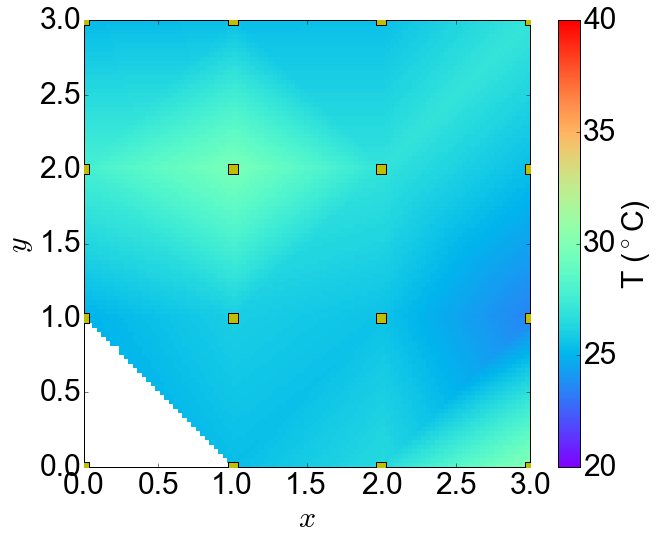

In [ ]:
%pwd
%pylab inline

from ser_ports import serial_ports
ser_ports = serial_ports()
print ser_ports
port_id = raw_input("Which COM port? Please enter a number: Example: 0")

%cd data

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.mlab as ml
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext
from collections import Counter
import scipy.ndimage as ndimage
import serial
import time
from IPython import display
import Tkinter, tkFileDialog

root = Tkinter.Tk() # make a top-level instance and hide since it is ugly and big
root.withdraw()
root.overrideredirect(True) # make it almost invisible - no decorations, 0 size, top left corner
root.geometry('0x0+0+0')
root.deiconify() # show window again and lift it to top so it can get focus
root.lift() # otherwise dialogs will end up behind the terminal.
root.focus_force()

fname_beta= tkFileDialog.askopenfilename(title = "Select file for beta")
data_beta = np.genfromtxt(fname_beta, delimiter=',', skip_footer=0, skip_header=0)
beta_n = np.array(data_beta)

fname_25 = tkFileDialog.askopenfilename(title = "Select file for 25C")
data_25 = np.genfromtxt(fname_25, delimiter=',', skip_footer=0, skip_header=0)
r_25 = np.array(data_25)

from matplotlib import rcParams
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial'],'size': 30})

fig = plt.figure(figsize=(10,8))


ny, nx = 100, 100
xmin, xmax = 0, 3
ymin, ymax = 0, 3
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)

x = np.array([0,0,1,1,2,2,3,3,3,3,2,2,1,1,0,0])
y = np.array([3,2,3,2,3,2,3,2,1,0,1,0,1,0,1,0])

ser = serial.Serial(ser_ports[int(port_id)], 115200)

while True:
    #print ser.readline()
    data = ser.readline().split(" ")
    if len(data)==33:
        try:
            
        
            rt = data[2::2];
            rt = np.array([float(rt) for rt in rt])
            
            t_therm = []
            
            for i in range (0,16):    
                t_therm.append(( 1/( (np.log(rt[i]/r_25[i])/beta_n[i])+(1/(25.0+273.0))))-273.0)

            zi = ml.griddata(x, y, t_therm, xi, yi,interp='linear')

            v = np.arange(20, 45, 5)
            #ct = plt.contour(xi, yi, zi, 20, linewidths = 0.5, colors = 'k')
            #hold(True)
            im = plt.pcolormesh(xi, yi, zi, cmap = plt.get_cmap('rainbow'), vmin=20, vmax=40)
            cb = plt.colorbar(im, orientation='vertical',ticks=v) 
            cb.set_label(r'T ($^\circ$C)',fontsize = 30)
            plt.scatter(x, y, marker = 's', c = 'y', s = 100, zorder = 100)
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            plt.xlabel(r"$x$")
            plt.ylabel(r"$y$")
            gcf().show()

            display.display(plt.gcf())
            display.clear_output(wait=True)
            cb.remove()
            im.remove()
            time.sleep(1)
        except KeyboardInterrupt:
            break  
        

## Step 4: Saving temperature maps

In [ ]:
%pwd
%pylab inline

cal_temp = raw_input("What is the measurement temp?")
sample_id = raw_input("What is the sample ID?")

from ser_ports import serial_ports
ser_ports = serial_ports()
print ser_ports
port_id = raw_input("Which COM port? Please enter a number: Example: 0")



import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.mlab as ml
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext
from collections import Counter
import scipy.ndimage as ndimage
import serial
import time
from IPython import display
import Tkinter, tkFileDialog

root = Tkinter.Tk() # make a top-level instance and hide since it is ugly and big
root.withdraw()
root.overrideredirect(True) # make it almost invisible - no decorations, 0 size, top left corner
root.geometry('0x0+0+0')
root.deiconify() # show window again and lift it to top so it can get focus
root.lift() # otherwise dialogs will end up behind the terminal.
root.focus_force()

fname_beta= tkFileDialog.askopenfilename(title = "Select file for beta")
data_beta = np.genfromtxt(fname_beta, delimiter=',', skip_footer=0, skip_header=0)
beta_n = np.array(data_beta)

fname_25 = tkFileDialog.askopenfilename(title = "Select file for 25C")
data_25 = np.genfromtxt(fname_25, delimiter=',', skip_footer=0, skip_header=0)
r_25 = np.array(data_25)

from matplotlib import rcParams
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial'],'size': 30})

fig = plt.figure(figsize=(10,8))


ny, nx = 100, 100
xmin, xmax = 0, 3
ymin, ymax = 0, 3
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)

x = np.array([0,0,1,1,2,2,3,3,3,3,2,2,1,1,0,0])
y = np.array([3,2,3,2,3,2,3,2,1,0,1,0,1,0,1,0])

ser = serial.Serial(ser_ports[int(port_id)], 115200)
t_therm = []

for i in range(3):
    #print ser.readline()
    data = ser.readline().split(" ")
    if len(data)==33:
        try:
            
        
            rt = data[2::2];
            rt = np.array([float(rt) for rt in rt])
            del t_therm
            t_therm = []
            
            for i in range (0,16):    
                t_therm.append(( 1/( (np.log(rt[i]/r_25[i])/beta_n[i])+(1/(25.0+273.0))))-273.0)

            zi = ml.griddata(x, y, t_therm, xi, yi,interp='linear')

            v = np.arange(20, 45, 5)
            ct = plt.contour(xi, yi, zi, 20, linewidths = 0.5, colors = 'k')
            #hold(True)
            im = plt.pcolormesh(xi, yi, zi, cmap = plt.get_cmap('rainbow'), vmin=20, vmax=40)
            cb = plt.colorbar(im, orientation='vertical',ticks=v) 
            cb.set_label(r'T ($^\circ$C)',fontsize = 26)
            plt.scatter(x, y, marker = 's', c = 'y', s = 100, zorder = 100)
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            plt.xlabel("x")
            plt.ylabel("y")
            plt.show()

            
        except KeyboardInterrupt:
            break  

t_therm = np.array(t_therm)
ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y_%m_%d_%H_%M_%S')
%cd data
filename = st+"_"+sample_id+"_calculated_temp_"+cal_temp+'.txt'

np.savetxt(filename, t_therm, fmt='%.6f', delimiter=' ')

fig.savefig(st+"_"+sample_id+"_calculated_temp_"+cal_temp+'.png', dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches=None, pad_inches=0,
            frameon=None)       
